In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import imdb
#%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
#setting parameters
MAX_NB_WORDS = 20000 # number of most-frequent words that are regarded, all others are ignored
EMBEDDING_DIM = 300 # dimension of word-embedding
MAX_EMB_WORDS=20000
MAX_SEQUENCE_LENGTH = 600 # all text-sequences are padded to this length
(x_train, y_train),(x_test,y_test)=imdb.load_data(num_words=MAX_NB_WORDS,skip_top=100)
print(len(x_train),'train sequences')
print(len(x_test), 'test sequences')
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 train sequences
25000 test sequences
2 classes


In [ ]:
#padding
x_train = pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)
#Embedding construction
embedding_layer = Embedding(MAX_NB_WORDS,
EMBEDDING_DIM,
#weights= [embedding_matrix] if USE_PRETRAINED else None,
input_length=MAX_SEQUENCE_LENGTH,
trainable=True)
print("Number of words in each input: ",MAX_SEQUENCE_LENGTH)


Number of words in each input:  600


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Setting up Model Structure
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(units=32)(embedded_sequences)
x = Dropout(0.3)(x)
preds = Dense(1,activation='sigmoid')(x)
model = Model(sequence_input, preds)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 600, 300)            │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │          42,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,042,657 (23.05 MB)

 Trainable params: 6,042,657 (23.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training Model
model.compile(loss=
'binary_crossentropy'
, optimizer=
'adam'
,
metrics=['accuracy'])
history=model.fit(x_train, y_train,
batch_size=128,
epochs=3,
validation_data=(x_test, y_test))

Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.6125 - loss: 0.6536 - val_accuracy: 0.8028 - val_loss: 0.4291
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.8165 - loss: 0.4027 - val_accuracy: 0.8554 - val_loss: 0.3442
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9231 - loss: 0.2102 - val_accuracy: 0.8595 - val_loss: 0.3554


In [ ]:
#Model Performance Metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

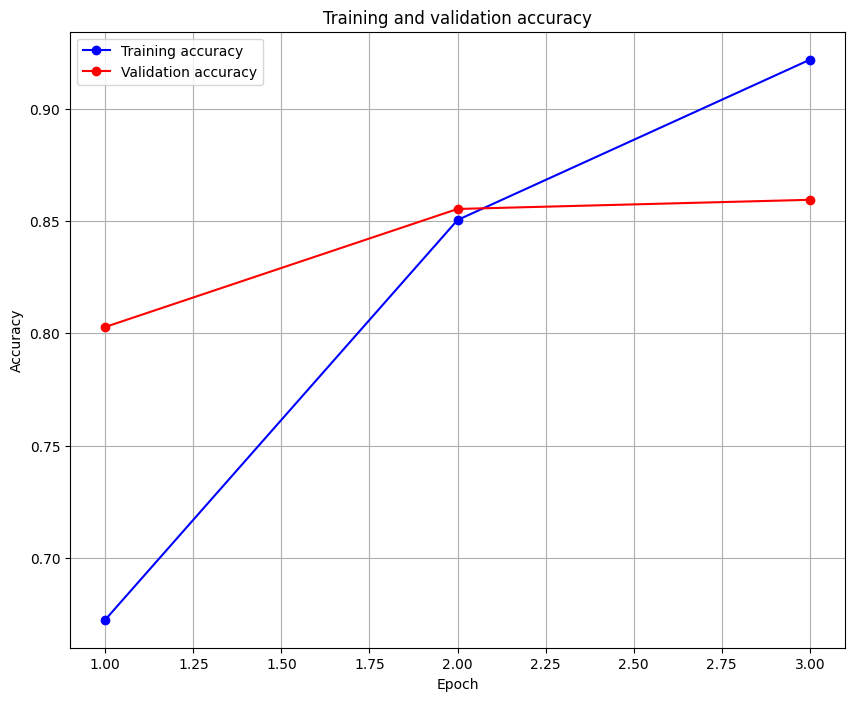

In [ ]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
